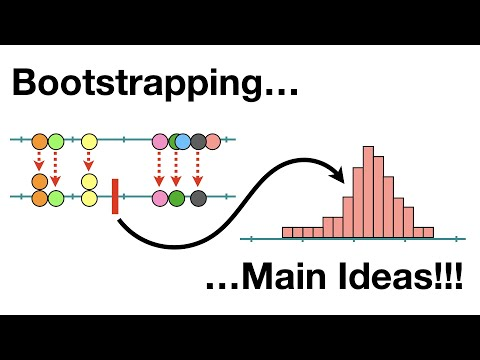

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# 1.

The difference between the "standard error of the mean" and the "standard deviation" of the original data:

- "Standard deviation" covers a wide range of the experiment result since the experiments were done repeatly with different values (in different datasets)
- "Standard error of the mean" is the result of bootstrapping, which makes the mean more concentrated because it is calculated by using different values but in same dataset

---

### Summary: Differences Between Standard Deviation (SD) and Standard Error of the Mean (SEM)

**Standard Deviation (SD)** and **Standard Error of the Mean (SEM)** are both measures of variability but capture distinct concepts:

1. **Standard Deviation (SD)**:
   - Measures the **spread** or **dispersion** of individual data points within the original dataset.
   - It shows how much the individual data points deviate from the sample mean.
   - SD is used to describe the **variability** within a dataset.
   - It does not depend on the sample size—adding more data points generally won’t change the SD unless the new points are more or less spread out.

2. **Standard Error of the Mean (SEM)**:
   - Measures the **precision** of the sample mean as an estimate of the population mean.
   - SEM quantifies how much the sample mean would vary if you took multiple samples from the population.
   - It decreases as the sample size increases, because larger samples tend to provide more accurate estimates of the population mean.
   - SEM can be estimated using bootstrapping, where multiple resamples from the original data provide different means. The standard deviation of these bootstrapped means is the bootstrapped SEM.

### Key Differences:
- **SD** refers to the variability of individual data points, while **SEM** refers to the variability of the sample mean.
- **SD** is independent of the sample size, while **SEM** decreases as the sample size increases.
- **SD** describes the data's spread, and **SEM** describes the accuracy of the sample mean in estimating the population mean.

In summary, while both measures capture variability, SD focuses on individual data points, and SEM focuses on the uncertainty in estimating the population mean from a sample.

---

Chat Box history link: https://chatgpt.com/share/66fdbe08-0188-8008-901c-b2082b1eafc5

# 2.

1. compute the standard error of the mean
2. identify the standard score (it tells how many standard deviations a data point is from the mean of a distribution)
3. calculate the confidence interval (using formula)

### Assignment Summary:

In this chat, we discussed key statistical concepts, particularly focusing on confidence intervals and standard deviation.

1. **Confidence Interval Using Standard Error of the Mean**:
   - A 95% confidence interval can be created using the standard error of the mean (SEM). The SEM is calculated as:
     \[
     \text{SEM} = \frac{s}{\sqrt{n}}
     \]
   - The Z-score for a 95% confidence level is 1.96. The confidence interval is then calculated using:
     \[
     \text{CI} = \bar{X} \pm Z \cdot \text{SEM}
     \]
   - An example with a sample mean of 75, standard deviation of 10, and sample size of 50 yielded a confidence interval of approximately [72.24, 77.76].

2. **Z-Score**:
   - A z-score indicates how many standard deviations a data point is from the mean and is calculated using:
     \[
     Z = \frac{X - \mu}{\sigma}
     \]
   - A positive z-score indicates the value is above the mean, while a negative z-score indicates it is below the mean.

3. **Standard Deviation**:
   - The standard deviation measures the variability of a dataset. For a sample, it is calculated as:
     \[
     s = \sqrt{\frac{1}{n-1} \sum (X_i - \bar{X})^2}
     \]
   - An example using the sample data points 4, 8, 6, 5, 3 showed that the sample standard deviation is approximately 1.92.


Chat box history link: https://chatgpt.com/share/66fdc16f-3b78-8008-8dbe-e061f89fa8e7

# 3.

1. Generate bootstrap samples
2. calculate and sort the bootstrap means
3. determine the confidence level using the 2.5th and 97.5th percentile of the bootstrap mean

np.quantile() allows us to specify the desire quantile directly instead of sorting and indexing them

### Summary of Discussion on Bootstrapped Confidence Intervals

In this chat, we explored methods for creating a 95% bootstrapped confidence interval using bootstrapped sample means. The key points discussed include:

1. **Generating Bootstrap Samples**:
   - Randomly draw samples (with replacement) from the original dataset to create multiple bootstrap samples, typically around 1,000 or more.

2. **Calculating Bootstrap Means**:
   - For each bootstrap sample, calculate the mean to form a distribution of sample means.

3. **Determining the Confidence Interval**:
   - The 95% confidence interval can be determined by calculating the 2.5th and 97.5th percentiles of the sorted bootstrap means.
   - This can be done using indexing of a sorted array or, more efficiently, by using the `np.quantile()` function from NumPy.

4. **Using `np.quantile()`**:
   - This function simplifies the calculation of quantiles directly, eliminating the need for sorting and manual indexing. You can specify the desired percentiles (e.g., `[0.025, 0.975]`) to obtain the lower and upper bounds of the confidence interval.

Chat Box history link: https://chatgpt.com/share/66fdc350-3df4-8008-a708-e146d9c32a10

In [2]:
import numpy as np

# Sample data (replace this with your actual sample)
sample_data = np.array([5, 7, 8, 6, 5, 9, 10, 8, 7])

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Function to calculate the bootstrap confidence interval for a given statistic
def bootstrap_ci(data, n_samples, alpha=0.05, statistic=np.mean):
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, size=(n_samples, len(data)), replace=True)
    
    # Calculate the statistic for each bootstrap sample
    bootstrap_statistics = np.array([statistic(sample) for sample in bootstrap_samples])
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_statistics, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Calculate the 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample_data, n_bootstrap_samples, statistic=np.mean)
print("95% Bootstrap Confidence Interval for Population Mean:", mean_ci)

# To calculate the 95% bootstrap confidence interval for the population median, 
# simply change the 'statistic' argument to np.median:
median_ci = bootstrap_ci(sample_data, n_bootstrap_samples, statistic=np.median)
print("95% Bootstrap Confidence Interval for Population Median:", median_ci)


95% Bootstrap Confidence Interval for Population Mean: (6.222222222222222, 8.222222222222221)
95% Bootstrap Confidence Interval for Population Median: (5.0, 9.0)


Steps:
- import numpy
- provide sample data
- give the number of times that we want the bootstrap to run
- calculate bootstrap confidence interval
- calculate the 95% bootstrap confidence interval for our sample mean
- changing median from mean can calculate the 95% bootstrap confidence interval for our sample median

---

### Summary of Chat

**Bootstrap Confidence Intervals:**
The user inquired about generating a 95% bootstrap confidence interval for a population mean based on a sample. They requested Python code and comments explaining how to modify the code for different population parameters, such as the population median.

**Python Code Provided:**
I provided a Python code example using the `numpy` library that demonstrates how to compute bootstrap confidence intervals. The code includes:
- Generation of bootstrap samples from the provided sample data.
- Calculation of the specified statistic (mean or median) for each bootstrap sample.
- Determination of the lower and upper bounds of the confidence interval using percentiles of the bootstrap statistics.

**Explanation of `import numpy as np`:**
I explained the purpose of the `import numpy as np` statement in Python, highlighting that it allows the user to include the NumPy library in their script and use the alias `np` for easier referencing. This practice helps in writing cleaner and more concise code.

---

Chat box history link: https://chatgpt.com/share/66fdc56c-95c8-8008-b3a8-9c6eb690da43

# 5.

Population parameter
- represents the true value of what we want to estimate
- accounts for uncertainty and variability in our sample 

Sample Statistic
- a value calculated from the sample data used to make inferences about that parameter
- we are able to calculate this because we have a range of data and we make it a 'sample'

---

In statistical inference, it's important to differentiate between the population parameter and the sample statistic when constructing confidence intervals. The **population parameter** represents the true value we aim to estimate, while the **sample statistic** is derived from the data collected in a sample. 

The sample statistic is a fixed value calculated from the sample, such as a mean or proportion. In contrast, the **confidence interval** is a range that estimates where the true population parameter likely lies, accounting for uncertainty and variability in the sample. It reflects potential errors and factors beyond our control, acknowledging that the sample statistic is only an estimate of the true population value. Thus, while the sample statistic provides a specific estimate, the confidence interval indicates the degree of uncertainty surrounding that estimate.

--- 

Chat box history link: https://chatgpt.com/share/66fdc977-ad78-8008-8ba1-95897e99cc41

# 6-1.

The process of bootstrapping:

1. collect data
2. Resample with replacement: randomly draw samples from the orignial data set, each bootstrap sample should be the same size as the original data set and can appear multiple times
3. repeat the process
4. analyze the bootstrap distribution

# 6-2.

The main purpose of bootstrapping:

1. estimating uncertainty: helps quantifying the variability and uncertainty
2. creating confidence interval: generate confidence interval for population parameter without relying on strong assumptions about the underlying distribution of the data
3. hypothesis testing: comparing the bootstrap distribution
4. model validation: assess the stability and reliability of statistical models

# 6-3.

First, clearly state the hypothesis average and collect samples from the population. Then, resample with replacement by using bootstrapping. Thirdly, calculate the bootstrap mean and create a bootstrap distribution. Comparing the bootstrap mean with the hypothesis mean then determine the confidence interval. Finally, draw a conclusion if the p-value is high or low to see if our guess is plausible.

# 7.

In the video, the confidence interval covers zero, failing to reject the null hypothesis. There is no conclusion if the drug has an effect on the patients since it doesn't specify it the effect is positive or negative. The sample statistic alone isn't enough, what matters is whether the range of possible true values excludes the "no effect" (zero).

# 8.

In [38]:
import pandas as pd
df = pd.read_csv('vaccine_dataset.csv')

Importing the vaccine dataset.

In [39]:
import numpy as np

def bootstrap_mean(data, num_bootstrap_samples=1000):
    # List to store the bootstrapped means
    bootstrapped_means = []

    # Generate `num_bootstrap_samples` samples
    for _ in range(num_bootstrap_samples):
        # Generate a bootstrap sample (resample with replacement)
        bootstrap_sample = np.random.choice(data, size=10, replace=True)
        
        # Calculate the mean of the bootstrap sample
        sample_mean = np.mean(bootstrap_sample)
        
        # Append the sample mean to the list
        bootstrapped_means.append(sample_mean)

    return np.array(bootstrapped_means)

Generating the bootstrap samples and repeat the steps.

In [40]:
# Assuming your DataFrame is df, and the column names are 'initial_score' and 'final_score'
df['score_diff'] = df['FinalHealthScore'] - df['InitialHealthScore']
data = df['score_diff'].dropna()  

Create another coloumn, score_diff, to calculate the value of affect of the vaccine.

In [30]:
import numpy as np

np.random.seed(100)  # Set seed for reproducibility

def bootstrap_mean_diff(data, num_bootstrap_samples=1000):
    bootstrapped_means = []
    
    for _ in range(num_bootstrap_samples):
        # Generate a bootstrap sample (size can be adjusted)
        bootstrap_sample = np.random.choice(data, size=10, replace=True)  # Using size=10 for this example
        
        # Calculate the mean of the bootstrap sample
        sample_mean = np.mean(bootstrap_sample)
        
        # Append the sample mean to the list
        bootstrapped_means.append(sample_mean)
    
    return np.array(bootstrapped_means)

Use np.random.seed() to set a value and remember the sequence. Then calculate the bootstrap means.

In [31]:
# Apply bootstrap to calculate means
bootstrap_means = bootstrap_mean_diff(data, num_bootstrap_samples=1000)

# Display the first few bootstrapped means
print(bootstrap_means[:5])

[1.8 3.1 7.6 1.  5.1]


95% Confidence Interval: [0.9, 8.002499999999998]


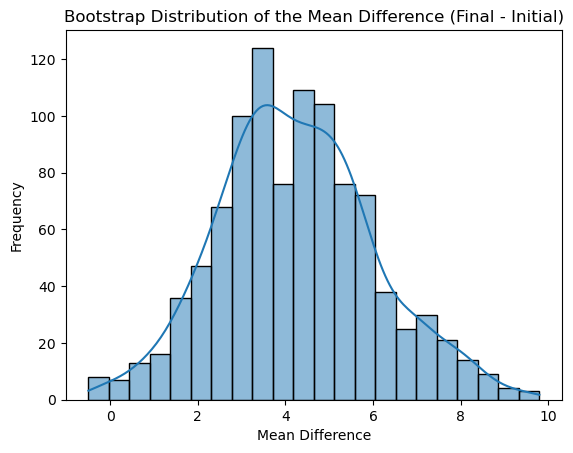

In [33]:
# Calculate the 95% Confidence Interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")

# Visualize the bootstrap distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of the Mean Difference (Final - Initial)')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.show()

The mean difference are mostly close to 2-6 by looking at the histogram. The smooth blue curve overlaid on the histogram shows the kernel density estimate, which provides a smoothed version of the distribution.

In [34]:
import numpy as np

# Example bootstrap means (replace this with your actual bootstrap_means array)
# bootstrap_means = bootstrap_mean_diff(data, num_bootstrap_samples=1000)

# Check if all bootstrap means are positive
all_positive = np.all(bootstrap_means > 0)

# Print the result
if all_positive:
    print("All bootstrap means are positive.")
else:
    print("Not all bootstrap means are positive.")

Not all bootstrap means are positive.


In [35]:
print("Bootstrap Means:", bootstrap_means)

Bootstrap Means: [ 1.8  3.1  7.6  1.   5.1  5.2  3.5  3.2  2.4  3.4  3.7  3.4  3.1  4.5
  3.8  7.4  2.2  5.7  6.3  4.1  7.8  2.7  4.6  4.1  5.5  1.6  5.8  4.8
  5.6  3.1  1.6  4.   6.5  5.2  5.8  1.9  0.9  4.7  7.1  0.7  4.6  5.7
  1.9  4.   6.9  7.6  3.4  5.6  1.9  4.2  5.   1.1  2.7  2.   2.6  3.2
  5.6  3.8  5.7  2.9  5.2  9.8  4.3  3.6  8.5  5.1  4.   5.6  2.5  4.1
  4.6  2.3  7.7  1.7  0.6  4.4  5.1  5.5  2.5  2.3  2.7  5.7  5.5  5.1
  3.8  3.1  5.2  6.   7.6  2.6  5.5  2.5  3.6  5.8  6.   1.7  6.7  4.6
  3.8  3.2  3.5  3.8  1.5  3.   8.1  4.8  1.8  2.9  6.   4.1  2.9  3.1
  3.5  8.5  4.   3.4  5.2  4.9  4.7  3.5  4.6  3.5  1.5  4.8  4.1  2.7
  5.7  2.5  3.5  3.7  4.2  3.6  5.7  5.6  3.   3.2  2.9  4.3  4.6  5.
  3.9  2.6  5.5  5.2  5.7  3.7  2.1  8.3  1.6  5.   7.8  4.2  4.2  4.1
  4.8  2.4  7.2  1.5  3.   3.6  5.9  5.2  3.4  6.1  6.8  6.   8.9  8.6
  4.1  4.4  2.1  5.5  4.3  6.1  2.4  3.9  6.6  5.1  4.6  3.3  4.8  2.4
  3.   4.   5.4  4.7  4.9  4.6  4.2  1.3  4.7  2.6  4.8  2.7 

In [37]:
if lower_bound <= 0 <= upper_bound:
    print("The 95% Confidence Interval includes zero.")
else:
    print("The 95% Confidence Interval does not include zero.")

The 95% Confidence Interval does not include zero.


In conclusion, the 95% confidence interval does not include zero. Therefore, we can reject the null hypothesis. 

### Summary:

1. **Hypothesis Testing**:
   - Discussed the concept of hypothesis testing, focusing on how a confidence interval covering zero leads to failing to reject the null hypothesis, while an interval not covering zero allows for rejection of the null hypothesis.

2. **Creating and Importing CSV Files**:
   - Provided guidance on creating a CSV file using Google Sheets and importing it into a Jupyter Notebook.

3. **Bootstrap Analysis**:
   - You were interested in bootstrapping the mean difference between two health scores (initial and final) and calculating confidence intervals for the mean difference.

4. **Using NumPy for Bootstrapping**:
   - Explained how to implement bootstrapping using `numpy`, including setting the random seed for reproducibility and sampling from your dataset.
   - Clarified what `np.random.seed()` does, emphasizing that it helps produce the same sequence of random numbers across runs.

5. **Analyzing Bootstrap Means**:
   - Discussed interpreting bootstrap means, specifically focusing on how the distribution of means and the presence of values near zero can inform conclusions about the null hypothesis.
   - Explored how to calculate and interpret the 95% confidence interval for the bootstrap means.

6. **Graphing Bootstrap Results**:
   - Provided an example of how to visualize the bootstrap means using a histogram with confidence intervals and annotations indicating lower and upper bounds.
   - Emphasized the importance of including a line at zero to assess whether the confidence interval overlaps with zero.

7. **Conclusion About Null Hypothesis**:
   - Confirmed that if the confidence interval does not include zero, you can reject the null hypothesis, suggesting a statistically significant effect of the vaccine.

Chat Box history link: https://chatgpt.com/share/66fe0647-7078-8008-baa1-84cb22e6247d

# 9.

Yes